<a href="https://colab.research.google.com/github/taros234567/data/blob/main/2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**지도 학습(supervised learning)**

* 훈련하기 위한 데이터와 함께 정답이 필요

  * 이전 장의 도미와 빙어의 예에서 생선의 길이와 무게는 훈련 데이터이고 정답은 도미인지 빙어인지 나타내는 데이터

  * 생선의 길이와 무게는 특성(feature)라고 함

* 보통 데이터는 입력(input), 정답은 타깃(target)이라 하고 이 둘을 합쳐 훈련 데이터(training data)이 함

* 지도 학습 알고리즘은 타깃을 활용하여 정답을 맞추는 것을 학습
  * 이전 장의 도미와 빙어의 예에서 도미인지 빙어인지 구분하는 것

**비지도 학습(unsupervised learning)**

* 정답이 없이 입력만 사용

* 정답을 사용하지 못하므로 무언가를 맞추는 것은 못함

* 대신 데이터를 파악하고 변형하는 데 사용

* 6장에서 배움

**강화 학습(reinforcement learning)**

* 알고리즘이 행동한 결과로 얻은 보상을 사용해 학습

* 이 수업에서는 다루지 않음

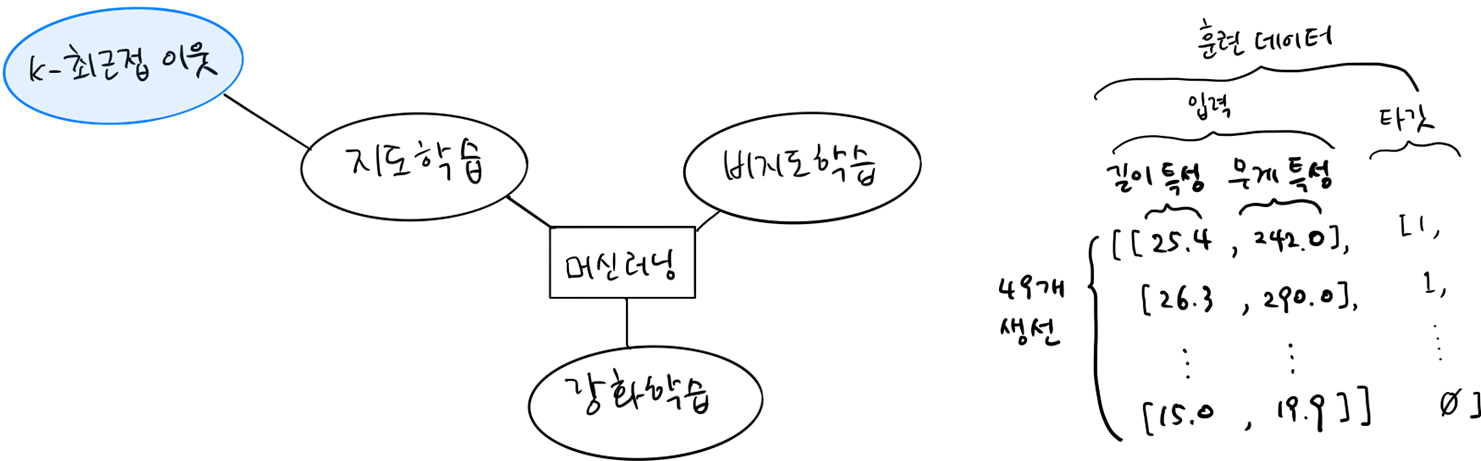

**이전 장의 알고리즘의 문제점**

* 머신러닝 알고리즘의 성능이 올바르게 평가되는가?

  * 훈련 데이터로 훈련이 잘 되어 있느지를 테스트

  * 항상  성능이 높게 나옴

* 어떻게 머신러닝 알고리즘의 성능을 올바르게 평가하는가?

  * 서로 다른 훈련 데이터과 테스트 데이터를 사용해야 함

    * 훈련 데이터와 다른 평가를 위한 또 다른 데이터를 준비

    * 준비된 데이터를 훈련 데이터과 테스트 데이터로 분리

* 훈련 세트(train set), 테스트 세트(test set)

http:/bit.ly/bream_smelt

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#2차원 샘플 리스트 생성
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
#지도학습을 위한 정답 리스트 생성
fish_target = [1]*35 + [0]*14

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

**인덱스(index)**

* 배열의 위치

* 리스트처럼 배열의 요소를 선택할 수 있음

In [ ]:
#fish_data의 다섯 번째 샘플 출력
print(fish_data[4])

[29.0, 430.0]


**슬라이싱(slicing)**

콜론(:)을 가운데 두고 인덱스의 범위를 지정하여 여러 개의 원소를 선택하는데 사용

In [ ]:
#fish_data의 첫번째 부터 다섯 번째 샘플 출력
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [ ]:
#처음부터 시작되는 슬라이싱의 경우 0을 생략 가능
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [ ]:
#마지막 원소까지 포함할 경우 두 번째 인덱스 생략 가능
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


데이터의 처음 35개를 훈련 세트로, 나머지 14개를 테스트 세트로 사용

In [2]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [3]:
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

0.0

**왜 정확도가 0% 일까?**

훈련 세트에 도미의 데이터만 테스트 세트에는 빙어의 데이터만 포함

이런 상황을 샘플링 편향(sampling bais)이라 함

이 알고리즘은 무조건 도미라고 분류함

훈련 세트와 데이터 세트에는 도미와 방어의 데이터가 적절히 섞여있어야 함

이런 작업을 간편하게 처리할 수 있는 파이썬 라이브러리가 있음

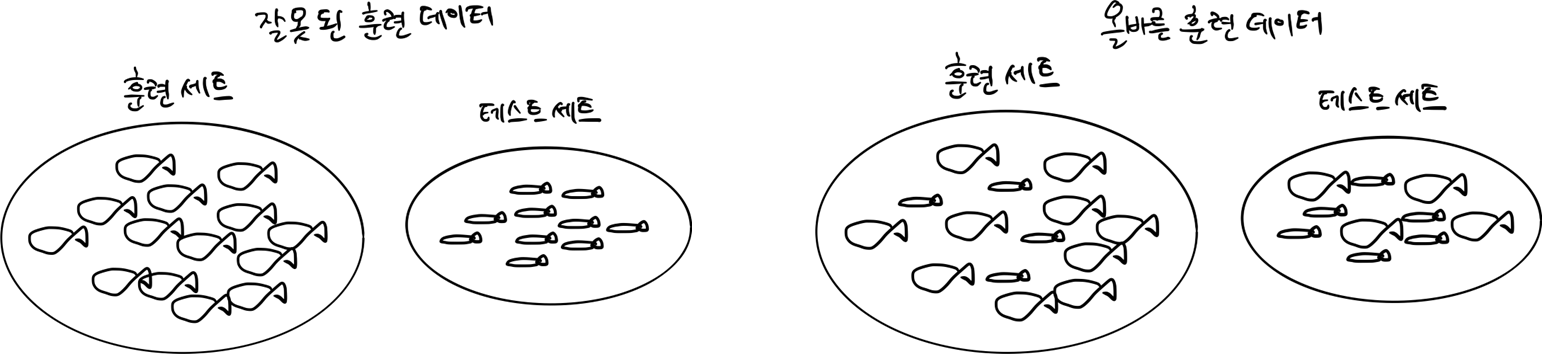

**넘파이(numpy)**

*파이썬의 대표적인 배열(array) 라이브러리*

* 파이썬의 리스트로 2차원 리스트를 표현할 수 있으나 고차원 리스트를 표현하려면 매우 번거로움

* 넘파이는 고차원 배열을 손쉽게 만들고 조작할 수 있는 많은 도구들을 제공

In [4]:
import numpy as np

#파이썬의 2차원 리스트를 넘파이 배열로 변환
input_arr = np.array(fish_data)
#fish_data: list
#input_arr: ndarray (n차원 배열 객체)
target_arr = np.array(fish_target)

print(input_arr)

#for n in range(0,49):
#  print(input_arr[n],', ',target_arr[n])

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


배열의 차원을 구분하기 쉽도록 행과 열을 가지런히 출력

넘파이 배열 객체는 배열의 크기를 알려주는 shape 속성을 제공

In [ ]:
print(input_arr.shape)

(49, 2)


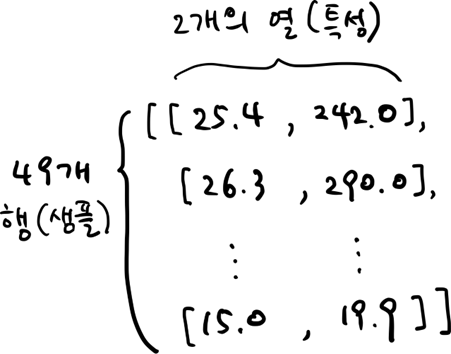

준비된 넘파이 배열을 랜덤하게 훈련 및 테스트 세트로 분리

* 여기서는 무작위로 샘플을 고르는 방식을 사용

* 주의: input_arr와 target_arr의 순서는 동일하게 변경되어야 함

**numpy.random.seed()**

* 무작위 결과를 만드는 함수들은 실행할 때마다 다른 결과를 만듦

* 동일한 결과를 얻고 싶다면 numpy.random.seed()함수를 사용하여 시드를 동일하게 설정하면 됨

**numpy.arange()**

* 정수 n을 전달하면 0에서부터 n-1까지 1씩 증가하는 배열을 생성

**numpy.random.shuffle()**

* 주어진 배열을 무작위로 섞음

In [8]:
np.random.seed(42)
index = np.arange(49)
print(index)

np.random.shuffle(index)
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


**배열 인덱싱(array indexing)**

여러 개의 인덱스로 한 번에 여러 개의 원소를 선택하는 기능

In [ ]:
print(index[[1,3]])
print(input_arr[[1,3]])

[45 44]
[[ 26.3 290. ]
 [ 29.  363. ]]


배열 인덱싱을 이용하여 훈련 및 테스트 세트 생성

In [11]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [12]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

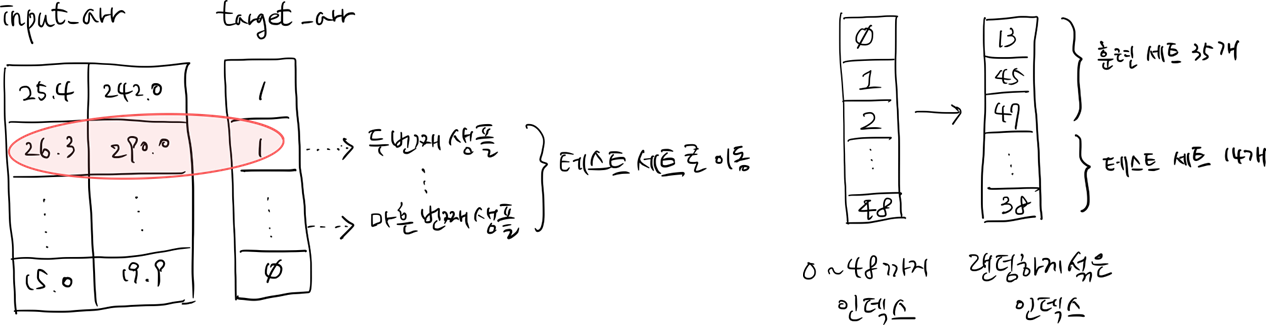

훈련 및 테스트 세트에 도미와 빙어가 잘 섞였는지 확인

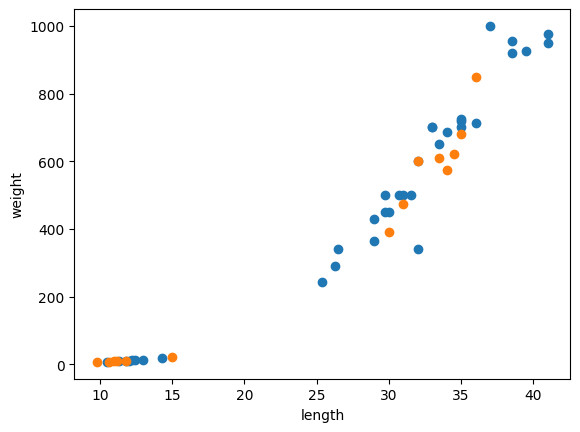

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [ ]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

예측 값을 보면 array가 표시됨

이는 출력이 파이썬의 리스트가 아니라 넘파이 배열이라는 것을 의미

사이킷런 모델의 입력과 출력은 모두 넘파이 배열

In [ ]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
print(np.array_equal(kn.predict(test_input),test_target))

True
